In [3]:
from fenics import *
from dolfin import *
from mshr import *

In [4]:
# create Mesh
domain1 = Circle(Point(0, 0), 2.5)
domain2 = Circle(Point(0, 0), 3)
domain = domain2 - domain1
mesh = generate_mesh(domain, 50)
epsilon_0 = 1
epsilon_e = 1
X = FunctionSpace(mesh, 'P', 1)


r = Expression("sqrt(x[0]*x[0]+x[1]*x[1])", degree=1)
theta = Expression("atan2(x[1],x[0])", degree=1)
tol = 1E-3
def outer_boundary(x, on_boundary):
    return on_boundary and sqrt(x[0]*x[0]+x[1]*x[1]) > 3-tol

def inner_boundary(x, on_boundary):
    return on_boundary and (2.5<sqrt(x[0]*x[0]+x[1]*x[1])<2.5 + tol)

bc = [DirichletBC(X, Expression("0",r=r,t=theta, degree=2), outer_boundary),
       DirichletBC(X, Expression("15",r=r,t=theta, degree=2), inner_boundary)]


# Define variational proble
V = TrialFunction(X)
v = TestFunction(X)
rho = Constant(0.5)
a = dot(grad(epsilon_0*epsilon_e*V), grad(v))*dx
L = rho*v*dx

In [5]:
# Compute solution
V1 = Function(X)
solve(a == L, V1, bc)

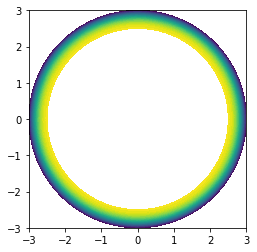

In [8]:
plot(V1)

In [17]:
# create Mesh
domain3 = Circle(Point(0, 0), 1.5)
domain4 = Circle(Point(0, 0), 2)
domain_1 = domain4 - domain3
mesh1 = generate_mesh(domain_1, 50)
epsilon_0 = 1
epsilon_e = 1
X = FunctionSpace(mesh1, 'P', 1)

r = Expression("sqrt(x[0]*x[0]+x[1]*x[1])", degree=1)
theta = Expression("atan2(x[1],x[0])", degree=1)
tol = 1E-3
def outer_boundary1(x, on_boundary):
    return on_boundary and sqrt(x[0]*x[0]+x[1]*x[1]) > 2-tol

def inner_boundary1(x, on_boundary):
    return on_boundary and sqrt(x[0]*x[0]+x[1]*x[1])<1.5 + tol

bc = [DirichletBC(X, Expression("0",r=r,t=theta, degree=2), outer_boundary1),
       DirichletBC(X, Expression("15",r=r,t=theta, degree=2), inner_boundary1)]


# Define variational proble
V2 = TrialFunction(X)
v = TestFunction(X)
rho = Constant(0.5)
a = dot(grad(epsilon_0*epsilon_e*V2), grad(v))*dx
L = rho*v*dx

In [18]:
# Compute solution
V2 = Function(X)
solve(a == L, V2, bc)

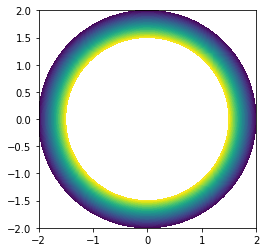

In [19]:
plot(V2)

(<matplotlib.tri.tricontour.TriContourSet at 0x7eff54302978>,
 <matplotlib.tri.tricontour.TriContourSet at 0x7eff5428d048>)

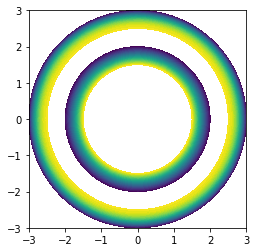

In [21]:
plot(V1), plot(V2)